In [8]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.special as spec
from tqdm import tqdm

In [9]:
def std_norm_cdf(x):
    x_clip = np.empty(x.shape)
    np.clip(x, -30, 100, out=x_clip)
    return spec.ndtr(x_clip)

In [21]:
f = np.random.normal(loc=0, scale=1, size=(1000))

sigmas = np.arange(0.01, 3.0, 0.01)
L_rels = np.empty(sigmas.shape[0])

for i in tqdm(len(sigmas)):

    sigma = sigmas[i]
    pairs = np.array(list(itertools.combinations(range(f.shape[0]), 2)), dtype=int)
    diffs = np.max(f[pairs], axis=1) - np.min(f[pairs], axis=1)

    L_rel = std_norm_cdf(diffs / (np.sqrt(2) * sigma))

    L_rels[i] = np.mean(L_rel)

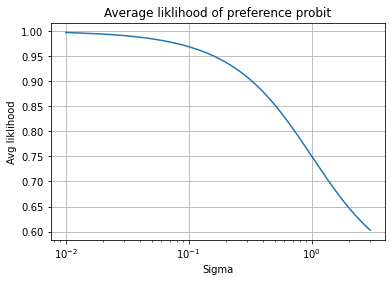

In [26]:
plt.plot(sigmas, L_rels)
plt.gca().set_xscale('log')
plt.grid(True)
plt.title('Average liklihood of preference probit')
plt.xlabel('Sigma')
plt.ylabel('Avg liklihood')
plt.show()